In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day42-outlier-removal-using-zscore/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


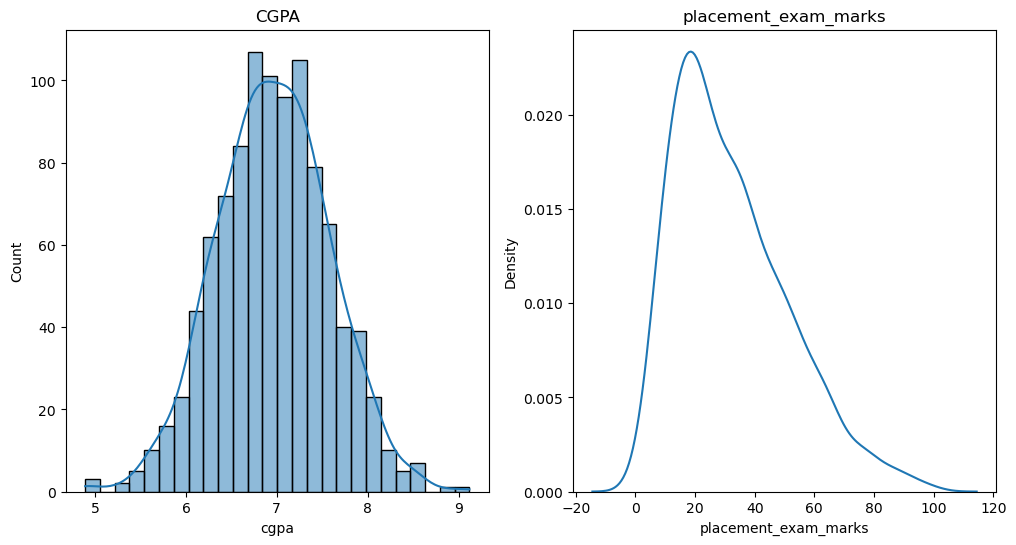

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde=True)
plt.title("CGPA")
plt.subplot(1,2,2)
sns.kdeplot(df["placement_exam_marks"])
plt.title("placement_exam_marks")
plt.show()

<Axes: ylabel='placement_exam_marks'>

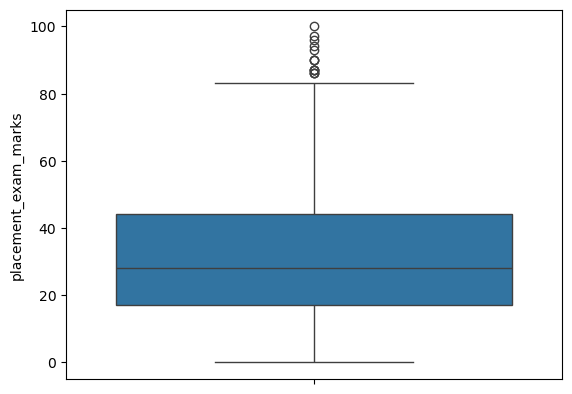

In [4]:
sns.boxplot(df['placement_exam_marks'])

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [7]:
iqr=44-17
iqr

27

In [15]:
upper_limit=44+(1.5*iqr)
upper_limit

84.5

In [12]:
lower_limit=17-(1.5*iqr)
lower_limit

-23.5

In [16]:
df[df["placement_exam_marks"]>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [14]:
df[df["placement_exam_marks"]<lower_limit]

,cgpa,placement_exam_marks,placed


In [18]:
# triming
new_df=df[df["placement_exam_marks"]<upper_limit]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: ylabel='placement_exam_marks'>

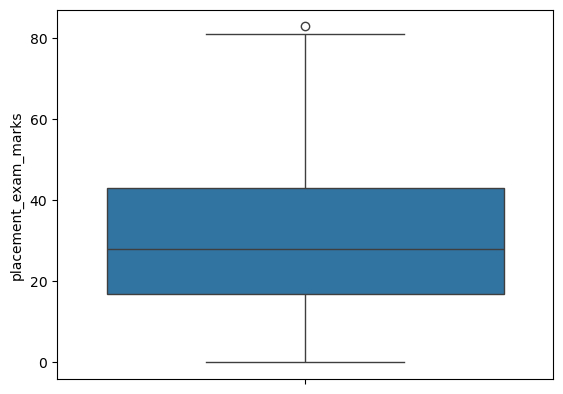

In [19]:
sns.boxplot(new_df["placement_exam_marks"])

In [20]:
# cappimg
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]>upper_limit,
    upper_limit,
    df["placement_exam_marks"]
)

In [21]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


<Axes: ylabel='placement_exam_marks'>

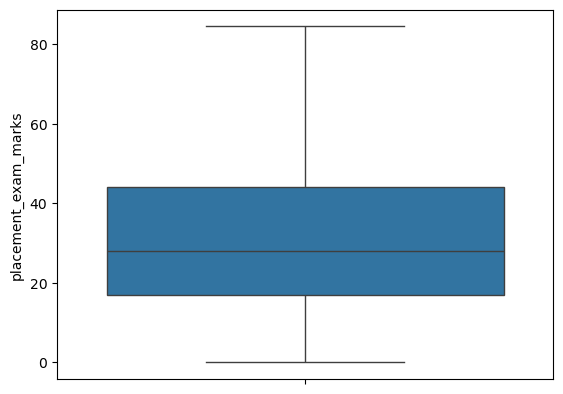

In [22]:
sns.boxplot(df["placement_exam_marks"])